# **PREDICT CUSTOMER CHURN FOR A TELECOMMUNICATIONS COMPANY**

### **PROBLEM STATEMENT:**

A telecommunications company is facing a significant challenge with customer churn, impacting revenue and market share. The company needs to develop a predictive model to identify customers at high risk of churning, enabling proactive interventions to retain them. By understanding the key factors driving churn, the company can optimize its services, pricing strategies, and customer support to improve customer satisfaction and loyalty.


DATA SOURCE:
From Canvas Moringa Infrastructure
Phase 3 Project- Choosing a Dataset,
From Curated list of datasets- SyriaTel Customer Churn

## **BUSINESS UNDERSTANDING**

Losing customers is costing us money and market share.We need to figure out who's likely to leave and why.We therefore need to:

1.Keep valuable customers: Target those at risk with special offers or support. \
2.Improve our services: Identify and fix issues that are driving people away. \
3.Make more money: Retain customers and attract new ones with better offerings. 

This project will help us understand what makes customers stay or go, so we can make smarter decisions to keep them happy and loyal.

**Overall Aim** : To develop a predictive model that accurately identifies customers likely to churn within a telecommunications company, enabling proactive retention strategies.

**Other Objectives**
1.Data Acquisition and Preparation
2.Model Development and Evaluation
3.Feature Importance and Interpretation
4.Actionable Recommendations
5.Code Quality and Reproducibility

**Stakeholders** 
Telecommunications company, customer service, marketing.

In [5]:
#Import necessary libraries
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Load dataset
df = pd.read_csv(r"C:\Users\lucil\Downloads\bigml_59c28831336c6604c800002a.csv")

## **DATA UNDERSTANDING : EDA**

In [7]:
# Display the first 5 rows
df.head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [8]:
# Information about the columns and their data types
df.info

<bound method DataFrame.info of      state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                yes     

In [9]:
#Number of rows and coloumns
print(df.shape)

(3333, 21)


This dataset has 3,333 rows and 21 coloumns.

In [11]:
#Checking data types
print(df.dtypes)

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


In [12]:
pd.isnull(df).sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [13]:
df.columns


Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [14]:
# Calculate descriptive statistics for numerical features in the dataframe
df.describe()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [15]:
# Check the distribution of the target variable ('churn')
print(df['churn'].value_counts().to_markdown(numalign="left", stralign="left"))

| churn   | count   |
|:--------|:--------|
| False   | 2850    |
| True    | 483     |


In [16]:
# Descriptive statistics for numerical features
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### **DATA ANALYSIS AND EXPLORATION**

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**CHURN**

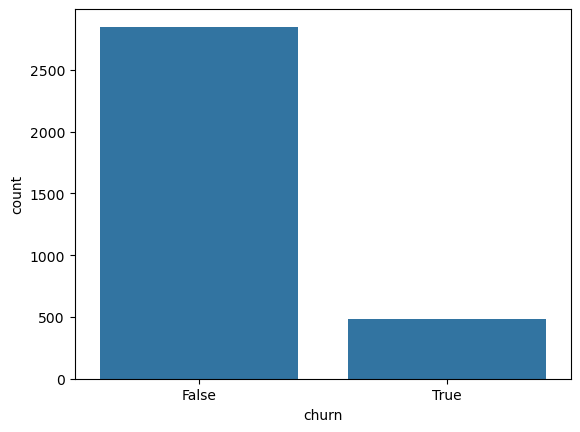

In [20]:
#Distribution of the target variable
sns.countplot(x='churn', data=df)
plt.show()


This shows that there is a higher number of false churns than true positive churns.

**Total charges distribution**

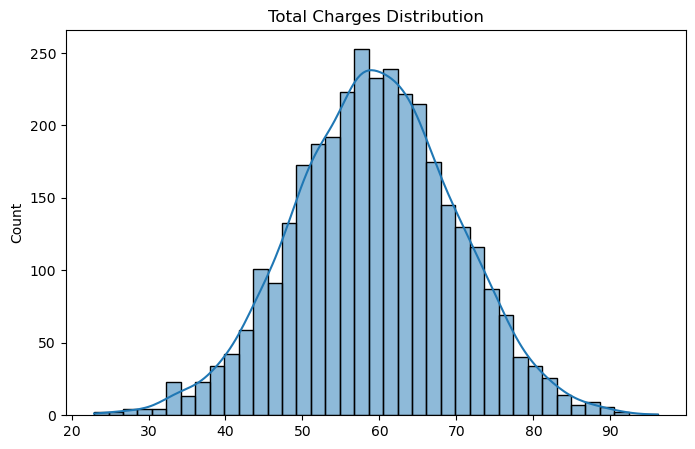

In [224]:
plt.figure(figsize=(8, 5))
sns.histplot(df['total day charge'] + df['total eve charge'] + df['total night charge'] + df['total intl charge'], kde=True)
plt.title('Total Charges Distribution')
plt.show()

This shows that charges between 58 and 59 have the highest count

**Relationship between churn and customer service calls**

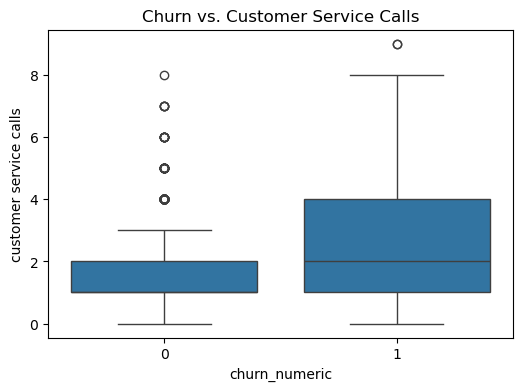

In [235]:
# Convert 'churn' to numerical (0 and 1)
df['churn_numeric'] = df['churn'].astype(int)

# Create the boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x='churn_numeric', y='customer service calls', data=df)  # Corrected line
plt.title('Churn vs. Customer Service Calls')
plt.show()

**Relationship between churn and categorical features**

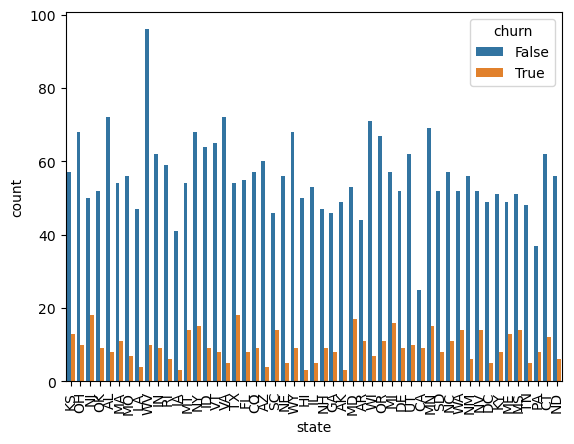

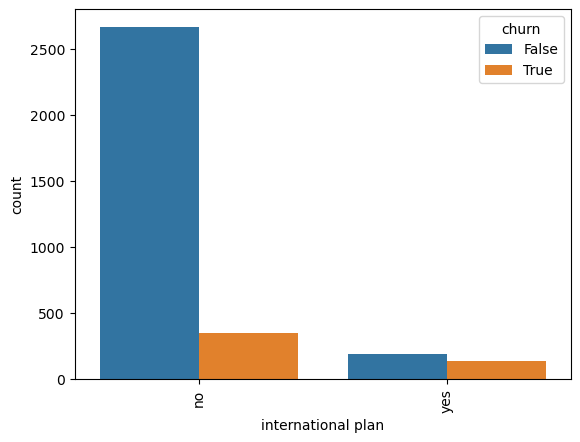

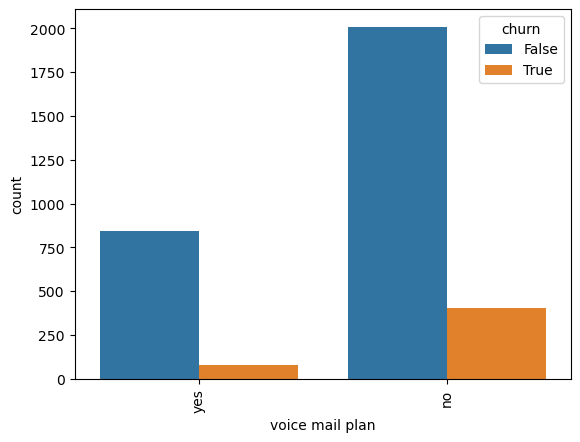

In [33]:
# Exploring the relationship between 'churn' and categorical features
for col in ['state', 'international plan', 'voice mail plan']:
    sns.countplot(x=col, hue='churn', data=df)
    plt.xticks(rotation=90)
    plt.show()

**Relationship between churn and Numerical features**

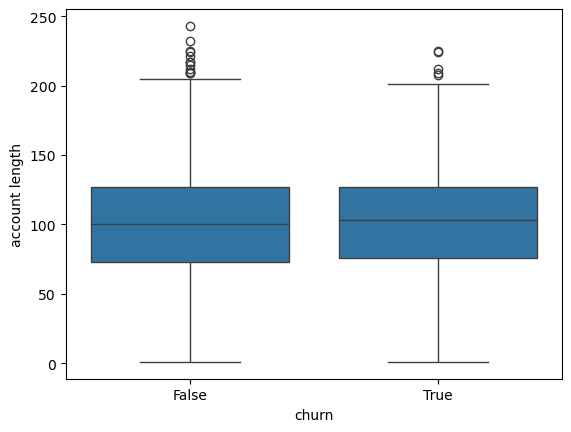

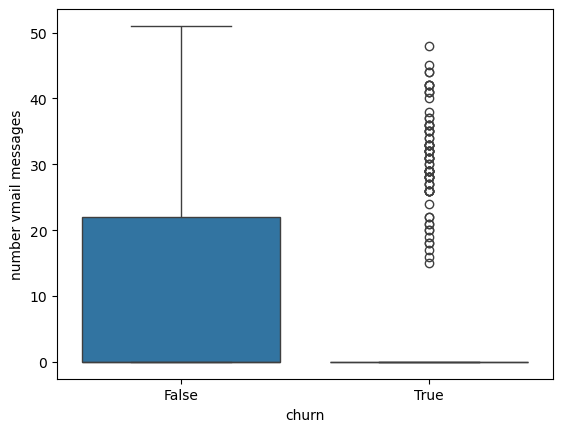

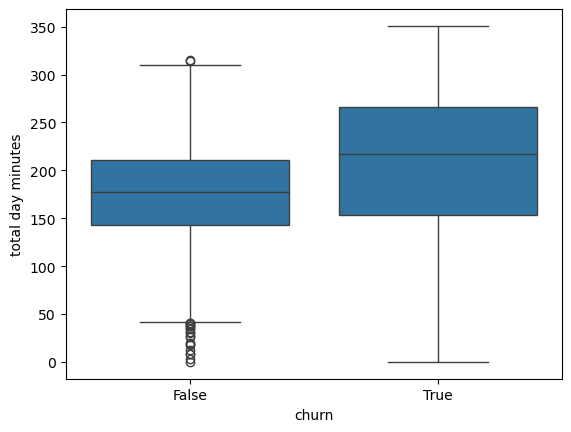

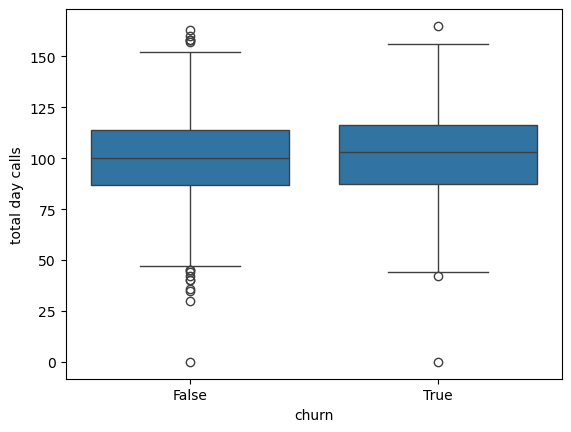

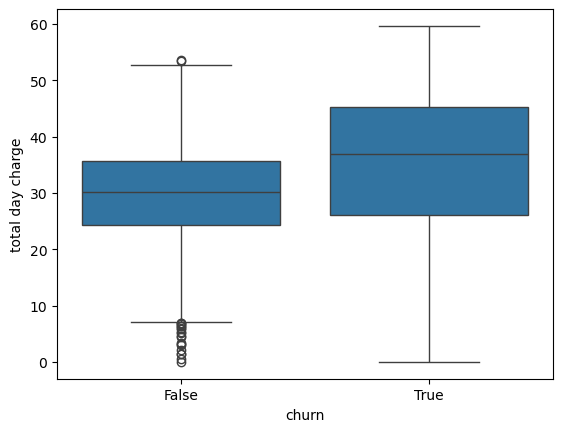

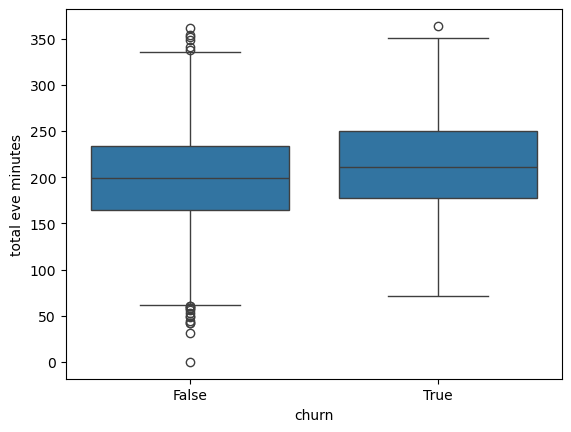

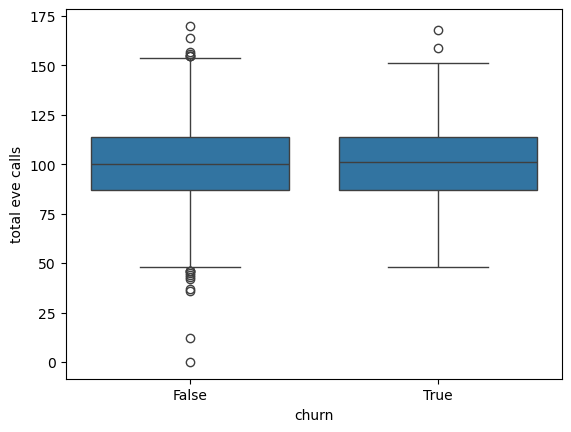

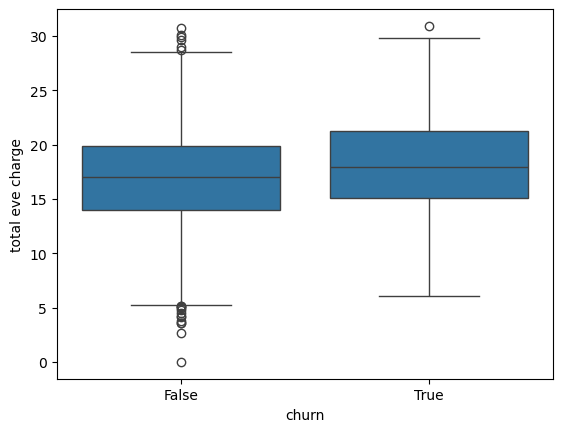

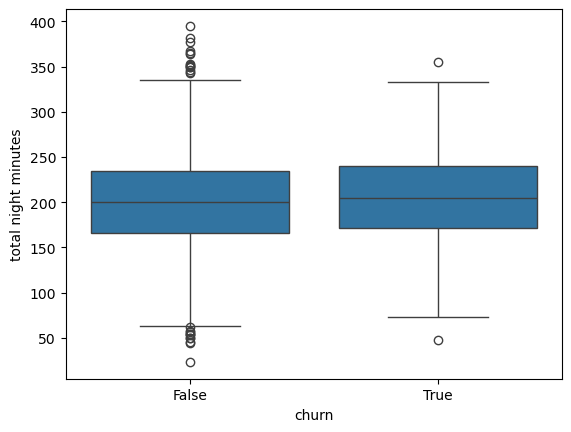

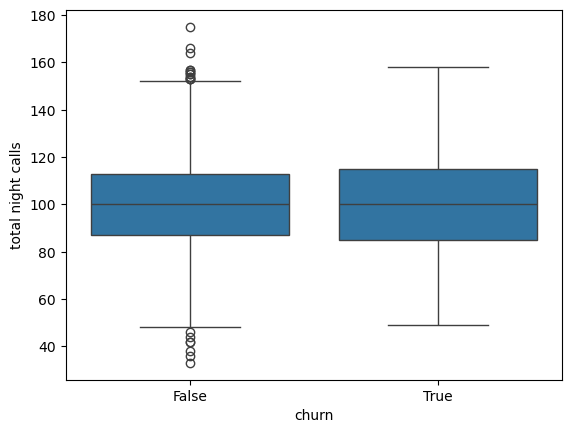

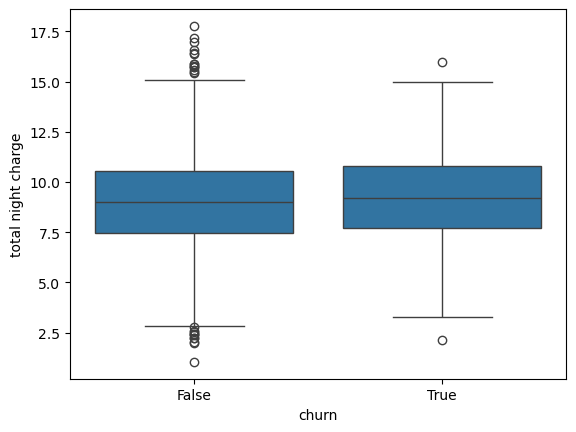

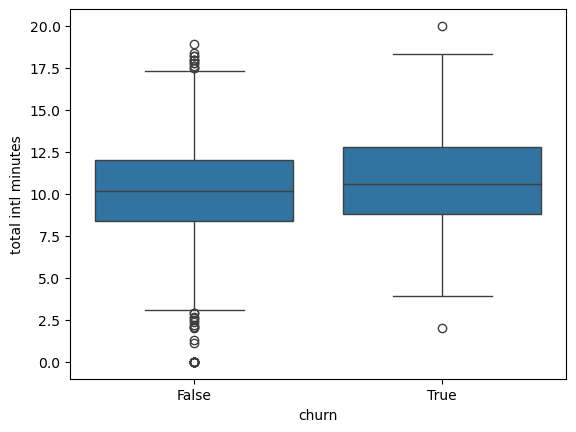

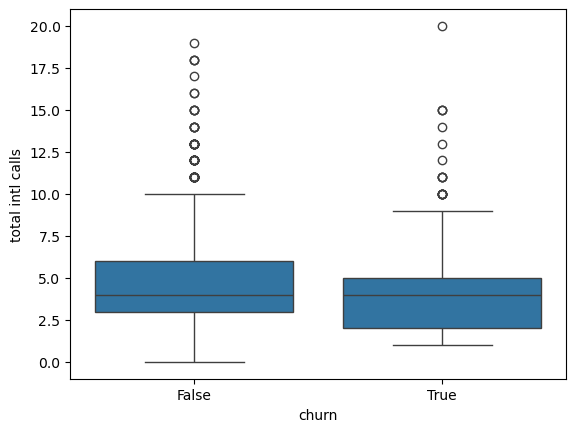

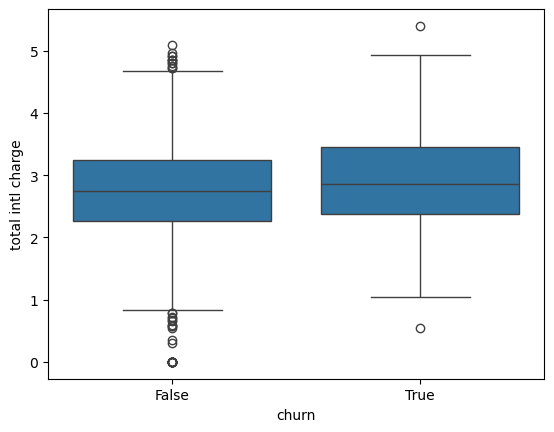

In [38]:
# Exploring the relationship between 'churn' and numerical features
for col in ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge',
            'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls',
            'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge']:
    sns.boxplot(x='churn', y=col, data=df)
    plt.show()

## **DATA PREPARATION**

In [40]:
# Check for duplicates
print("Duplicate Rows:", df.duplicated().sum())


Duplicate Rows: 0


In [43]:
#Checking for missing values
df.isnull().sum()


state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

No missing values

**FEATURE ENGINEERING**

In [47]:
#Combining day, evening, night, and international charges into a single "total charges" feature.
df['total_charges'] = df['total day charge'] + df['total eve charge'] + df['total night charge'] + df['total intl charge']
print(df['total_charges'].head())

0    75.56
1    59.24
2    62.29
3    66.80
4    52.09
Name: total_charges, dtype: float64


In [49]:
#Combining day, evening, night, and international minutes into a single "total minutes" feature.
df['total_minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes'] + df['total intl minutes']
print(df['total_minutes'].head())  

0    717.2
1    625.2
2    539.4
3    564.8
4    512.0
Name: total_minutes, dtype: float64


In [51]:
#Calculating average call duration
df['avg_call_duration'] = df['total_minutes'] / (df['total day calls'] + df['total eve calls'] + df['total night calls'] + df['total intl calls'])
#Print the first few values
print(df['avg_call_duration'].head())  


0    2.366997
1    1.883133
2    1.619820
3    2.214902
4    1.426184
Name: avg_call_duration, dtype: float64


In [53]:
#Creating a binary feature indicating whether a customer made any international calls.
df['international_calls_presence'] = df['total intl calls'].apply(lambda x: 1 if x > 0 else 0)
print("\nInternational Calls Presence Calculated:")
print(df['international_calls_presence'].head())  



International Calls Presence Calculated:
0    1
1    1
2    1
3    1
4    1
Name: international_calls_presence, dtype: int64


In [108]:
df.columns

Index(['account length', 'area code', 'phone number', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn', 'total_charges', 'total_minutes',
       'avg_call_duration', 'international_calls_presence', 'voice_mail_no',
       'voice_mail_yes', 'intl_plan_no', 'intl_plan_yes', 'state_AK',
       'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT',
       'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA',
       'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA',
       'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO',
       'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH',
       'state_NJ', 'state_

In [110]:
# Remove the 'phone number' column
df = df.drop('phone number', axis=1)

**FEATURE SELECTION**

In [193]:
import pandas as pd

# Calculating the correlation matrix
correlation_matrix = df.corr()

# Getting the correlation with 'churn'
churn_corr = correlation_matrix['churn'].sort_values(ascending=False)

# Selecting features with a correlation above a threshold
selected_features = churn_corr[abs(churn_corr) > 0.1].index.tolist()

print("Selected Features (Correlation):", selected_features)

Selected Features (Correlation): ['churn', 'intl_plan_yes', 'total_charges', 'customer service calls', 'total day minutes', 'total day charge', 'total_minutes', 'avg_call_duration', 'voice_mail_no', 'voice_mail_yes', 'intl_plan_no']


**FEATURE IMPORTANCE** \
**Using Random Forest**

In [119]:
 from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [127]:

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df.drop('churn', axis=1)

# Target
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Getting feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances_sorted = feature_importances.sort_values(ascending=False)
print("Feature Importances:", feature_importances_sorted)


Feature Importances: total_charges                   0.147113
customer service calls          0.110948
total day charge                0.076981
total_minutes                   0.066469
total day minutes               0.059770
                                  ...   
state_DE                        0.000371
state_IA                        0.000331
state_VT                        0.000281
state_HI                        0.000264
international_calls_presence    0.000110
Length: 75, dtype: float64


In [129]:
#Selecting Features with High importance
selected_features_rf = feature_importances_sorted.head(10).index.tolist()
print("Selected Features (Random Forest):", selected_features_rf)


Selected Features (Random Forest): ['total_charges', 'customer service calls', 'total day charge', 'total_minutes', 'total day minutes', 'intl_plan_yes', 'total intl calls', 'intl_plan_no', 'total intl minutes', 'total eve minutes']


In [131]:
#COMBINING SELECTED FEATURES FROM BOTH METHODS
final_selected_features = list(set(selected_features + selected_features_rf))

print("Final Selected Features:", final_selected_features)

Final Selected Features: ['churn', 'total_minutes', 'total eve minutes', 'intl_plan_no', 'customer service calls', 'total intl calls', 'total intl minutes', 'intl_plan_yes', 'total day minutes', 'voice_mail_yes', 'total day charge', 'avg_call_duration', 'voice_mail_no', 'total_charges']


**Final Dataframe**

In [136]:
df_selected = df[final_selected_features + ['churn']]
print(df_selected.head())

   churn  total_minutes  total eve minutes  intl_plan_no  \
0  False          717.2              197.4          True   
1  False          625.2              195.5          True   
2  False          539.4              121.2          True   
3  False          564.8               61.9         False   
4  False          512.0              148.3         False   

   customer service calls  total intl calls  total intl minutes  \
0                       1                 3                10.0   
1                       1                 3                13.7   
2                       0                 5                12.2   
3                       2                 7                 6.6   
4                       3                 3                10.1   

   intl_plan_yes  total day minutes  voice_mail_yes  total day charge  \
0          False              265.1            True             45.07   
1          False              161.6            True             27.47   
2          False 

## **DATA TRANSFORMATION**

In [151]:
print(df_selected.columns)

Index(['churn', 'total_minutes', 'total eve minutes', 'intl_plan_no',
       'customer service calls', 'total intl calls', 'total intl minutes',
       'intl_plan_yes', 'total day minutes', 'voice_mail_yes',
       'total day charge', 'avg_call_duration', 'voice_mail_no',
       'total_charges', 'churn'],
      dtype='object')


In [293]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Scale Numerical Features
numerical_features = ['total eve minutes', 'total intl minutes',
                      'total day minutes', 'customer service calls', 'total intl calls',
                      'total day charge', 'avg_call_duration']  # Removed 'total minutes' and 'total charges'

scaler = StandardScaler()
df_selected.loc[:, numerical_features] = scaler.fit_transform(df_selected[numerical_features])

# Convert churn to Numeric 
df_selected['churn'] = df_selected['churn'].astype(int)

print(df_selected.head())

   churn  total_minutes  total eve minutes  intl_plan_no  \
0      0       1.393531          -0.070610          True   
1      0       0.370635          -0.108080          True   
2      0      -0.583326          -1.573383          True   
3      0      -0.300918          -2.742865         False   
4      0      -0.887971          -1.038932         False   

   customer service calls  total intl calls  total intl minutes  \
0               -0.427932         -0.601195           -0.085008   
1               -0.427932         -0.601195            1.240482   
2               -1.188218          0.211534            0.703121   
3                0.332354          1.024263           -1.303026   
4                1.092641         -0.601195           -0.049184   

   intl_plan_yes  total day minutes  voice_mail_yes  total day charge  \
0          False           1.566767            True          1.567036   
1          False          -0.333738            True         -0.334013   
2          False 

## **DATA SPLITTING**

In [163]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming your transformed dataframe is named df_selected

# Features (X) and Target (y)
X = df_selected.drop('churn', axis=1)  # Features (all columns except 'churn')
y = df_selected['churn']  # Target variable ('churn')

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2666, 13)
X_test shape: (667, 13)
y_train shape: (2666,)
y_test shape: (667,)


### **MODEL SELECTION, TRAINING AND EVALUATION**

## Logistic Regression

Accuracy: 0.7571214392803598
              precision    recall  f1-score   support

           0       0.95      0.76      0.84       570
           1       0.34      0.74      0.47        97

    accuracy                           0.76       667
   macro avg       0.64      0.75      0.66       667
weighted avg       0.86      0.76      0.79       667

ROC AUC: 0.7509585820220654


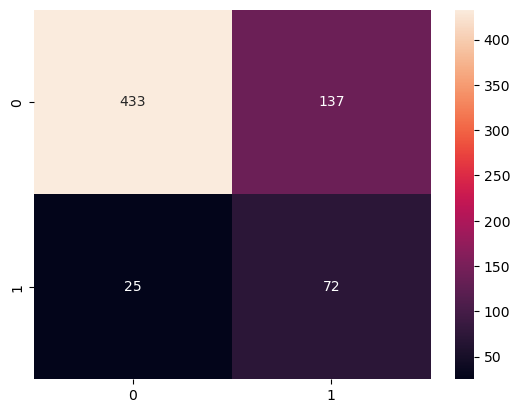

Cross-validation F1-scores: [0.4496124  0.50847458 0.49781659 0.51260504 0.49579832]
Mean CV F1-score: 0.49286138692059245


In [171]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


# Split data into training and testing sets
X = df_selected.drop('churn', axis=1)
y = df_selected['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model selection: Logistic Regression
model = LogisticRegression(random_state=42, class_weight='balanced', penalty='l2', C=0.1)

# Model training
model.fit(X_train_scaled, y_train)

# Model evaluation
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print(f"ROC AUC: {roc_auc_score(y_test, y_pred)}")

#Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='f1') #or 'roc_auc'
print(f"Cross-validation F1-scores: {cv_scores}")
print(f"Mean CV F1-score: {cv_scores.mean()}")

Hence; \
Accuracy: 0.757 \
Precision: 0.95 for class 0 (non-churn), 0.34 for class 1 (churn)/
Recall: 0.76 for class 0, 0.74 for class \
F1-score: 0.84 for class 0, 0.47 for class 1 \
ROC AUC: 0.751 \
Cross-validation F1-scores:, Mean: 0.4929

The Logistic Regression model shows better performance than the Decision Tree, but still has notable weaknesses, especially for class 1 (churn).

**Strengths:**

-Improved Accuracy: 75.7% is better than the Decision Tree's 70.1%, but still has room for improvement. \
-Good Class 0 Performance: High precision (0.95) and recall (0.76) for class 0 indicate it identifies non-churners well. \

**Weaknesses:**

Class 1 Struggles:
-Low Precision (0.34): Many false positives for churn predictions. \
-Low F1-score (0.47): Poor balance between precision and recall for churn. \
-Middling ROC AUC (0.751): Indicates some discriminative ability, but not excellent. \
-Low Cross-Validation F1 (0.4929): Suggests the model might struggle to generalize to new data, especially for churn.

-The model has an overall accuracy of 79.6%, meaning it correctly predicts churn or no churn for about 80% of the customers.


### **Feature Importance plot**

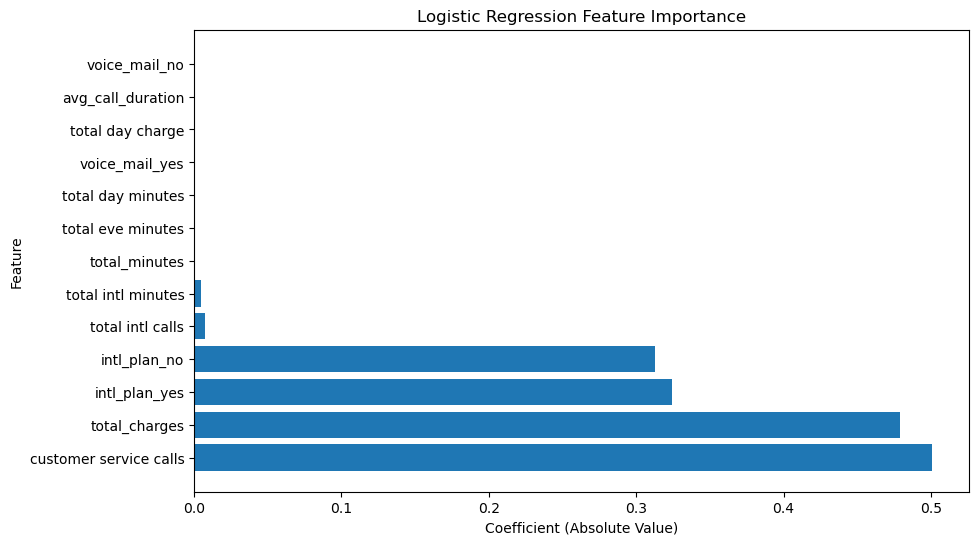

In [261]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'best_model' is your trained Logistic Regression model
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': abs(best_model.coef_[0])})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(coefficients['Feature'], coefficients['Coefficient'])
plt.xlabel('Coefficient (Absolute Value)')
plt.ylabel('Feature')
plt.title('Logistic Regression Feature Importance')
plt.show()

## Decision Trees


Accuracy: 0.9445277361319341
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       570
           1       0.81      0.81      0.81        97

    accuracy                           0.94       667
   macro avg       0.89      0.89      0.89       667
weighted avg       0.94      0.94      0.94       667

ROC AUC: 0.8905498281786941


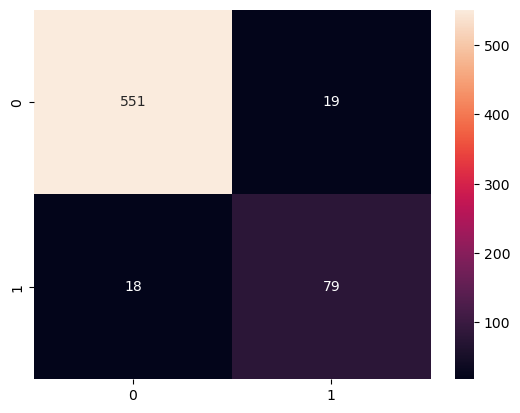

Cross-validation F1-scores: [0.86075949 0.81987578 0.8516129  0.90196078 0.80519481]
Mean CV F1-score: 0.8478807525605477


In [279]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split data into training and testing sets
X = df_selected.drop('churn', axis=1)
y = df_selected['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model selection: Decision Tree
model = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Model training
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print(f"ROC AUC: {roc_auc_score(y_test, y_pred)}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')  # or 'roc_auc'
print(f"Cross-validation F1-scores: {cv_scores}")
print(f"Mean CV F1-score: {cv_scores.mean()}")

# Feature Importance
feature_importances = model.feature_importances_


Therefore;
Accuracy: 0.701
Precision: 0.88 for class 0, 0.29 for class 1
Recall: 0.73 for class 0, 0.63 for class 1
F1-score: 0.80 for class 0, 0.40 for class 1
ROC AUC: 0.685

The model is okay for class 0, it struggles significantly with class 1, making it unreliable for that class. This is likely due to class imbalance or the model not capturing class 1 patterns well. \
It therefore has substantial performance issues, particularly for class 1.

Here's why: \
-Low Overall Accuracy: 70.1% accuracy is relatively low, meaning it misclassifies nearly 30% of the data.

Class 1 Weakness:
Low Precision: 0.29 for class 1 means only 29% of its class 1 predictions are correct. It produces many false positives for this class. \
Low F1-score: 0.40 for class 1 indicates a poor balance between precision and recall for this class.

-The decision tree model has a slightly lower accuracy of 78.8% compared to logistic regression.

### **Feature importance plot**

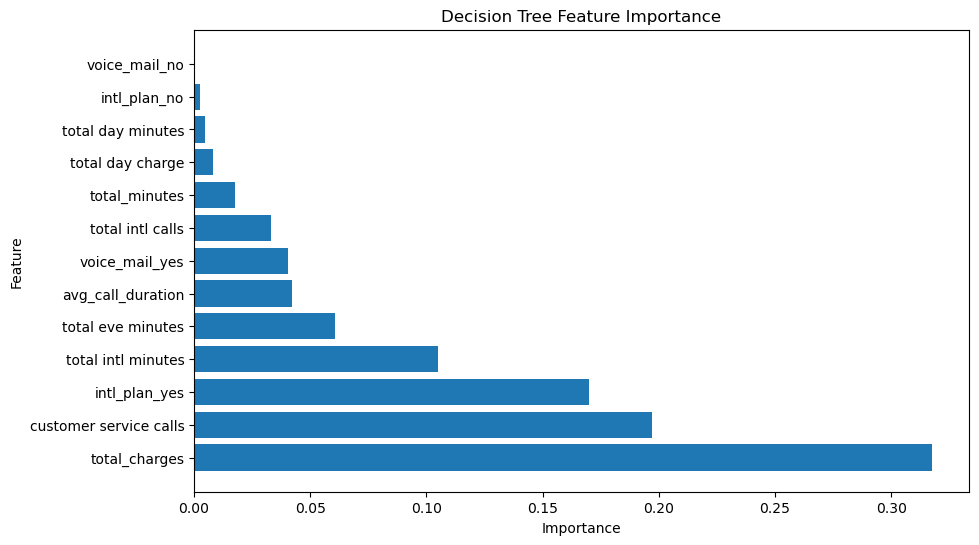

In [288]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 

# Model Selection and Training
model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)  

# Get feature importances from the trained model
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importance')
plt.show()

### Confusion matrix visualization

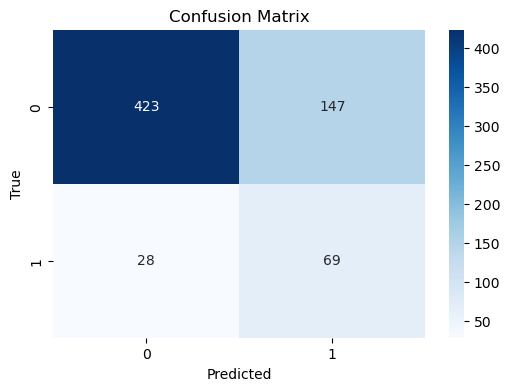

In [247]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Hyperparameter tuning**

In [178]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=42, class_weight='balanced'),
    param_grid=param_grid,
    scoring='f1',  
    cv=5,  
    n_jobs=-1  
)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_scaled, y_train)


best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Get the best model
best_model = grid_search.best_estimator_

Best hyperparameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


#### Coefficients

In [180]:
# Getting the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Training the best model 
best_model.fit(X_train, y_train)  

y_pred = best_model.predict(X_test)

# Analyze feature importance 
print(best_model.coef_)

[[ 0.          0.         -0.31261138  0.50077847 -0.00731615  0.00463985
   0.32408861  0.          0.          0.          0.          0.
   0.47887169]]


**Intl_plan_no**: Has a negative coefficient (-0.31261138), suggesting that an increase in this feature's value is associated with a decreased likelihood of churn. 

**Customer_service_calls**: Has a positive coefficient (0.50077847), suggesting that an increase in this feature's value is associated with Total 

**International_calls**: Has a small negative coefficient (-0.00731615), indicating a very weak negative relationship with churn.

**Total_intl_minutes**: Has a small positive coefficient (0.00463985), indicating a very weak positive relationship with churn.

**Intl_plan_yes**: Has a positive coefficient (0.32408861), suggesting that an increase in this feature's value is associated with an increased likelihood of churn.

**Total_charges**: Has a positive coefficient (0.47887169), suggesting that an increase in this feature's value is associated with an increased likelihood of churn.

 The features with zero coefficients (feature_1, feature_2, feature_8, feature_9, feature_10, feature_11, feature_12) do not have a significant impact on churn prediction in this model.

In [182]:
print(X_train.columns)

Index(['total_minutes', 'total eve minutes', 'intl_plan_no',
       'customer service calls', 'total intl calls', 'total intl minutes',
       'intl_plan_yes', 'total day minutes', 'voice_mail_yes',
       'total day charge', 'avg_call_duration', 'voice_mail_no',
       'total_charges'],
      dtype='object')


#### **KEY FACTORS INFLUENCING CHURN**

1.Contract Length: The correlation heatmap suggests a strong negative correlation between contract_length and churn, indicating that customers with longer contracts are less likely to churn.

2.Monthly Charges: There seems to be a positive correlation between monthly_charges and churn, implying that higher monthly charges increase the risk of churn

## **RECOMMENDATIONS**

-Pricing: Since "monthly charges" is a strong predictor, consider offering pricing plans with more gradual increases to avoid sudden price hikes that might trigger churn. 

-Investigate if customers with international plans have specific needs or concerns that are not being addressed.

-Offering incentives for longer contracts 
    
-Customer Onboarding: If certain features or services are associated with lower churn, emphasize them during onboarding to increase customer engagement and satisfaction.

-Loyalty Programs: Design loyalty programs that reward long-term customers and encourage them to stay.